In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import re

In [8]:
loan = pd.read_csv("loan.csv", sep=",",encoding = "ISO-8859-1",low_memory = False)
#Information about dataset
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [9]:

#get number of rows and columns in the dataset

print("Shape of the dataset : ", loan.shape,"\n")
print("Columns of the dataset : ")
loan.columns

Shape of the dataset :  (39717, 111) 

Columns of the dataset : 


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning Start

In [10]:
#get columns with null values
null_columns = loan.columns[loan.isnull().any()]

print("Columns containing NA values : \n" , null_columns,"\n\n")

#get percentage of null values
null_count = (loan[null_columns].isnull().sum()/len(loan.index))*100

print("Percentage of null values in each columns : \n",null_count)

Columns containing NA values : 
 Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'mths_since_last_record', 'revol_util', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_12

In [11]:
# removing the columns having more than 90% missing values
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)
loan_df = loan.drop(missing_columns, axis=1)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [12]:
print("Column details after removing null values")
print("=============================================")
print("Shape of the dataset : ",loan_df.shape)
#get columns with null values
null_columns = loan_df.columns[loan_df.isnull().any()]
print("Columns containing NA values : \n" , null_columns,"\n\n")

#get percentage of null values
null_count = (loan_df[null_columns].isnull().sum()/len(loan_df.index))*100
print("Percentage of null values in each columns : \n",null_count)

Column details after removing null values
Shape of the dataset :  (39717, 55)
Columns containing NA values : 
 Index(['emp_title', 'emp_length', 'desc', 'title', 'mths_since_last_delinq',
       'revol_util', 'last_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'chargeoff_within_12_mths',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object') 


Percentage of null values in each columns : 
 emp_title                      6.191303
emp_length                     2.706650
desc                          32.580507
title                          0.027696
mths_since_last_delinq        64.662487
revol_util                     0.125891
last_pymnt_d                   0.178765
last_credit_pull_d             0.005036
collections_12_mths_ex_med     0.140998
chargeoff_within_12_mths       0.140998
pub_rec_bankruptcies           1.754916
tax_liens                      0.098195
dtype: float64


# Inference:
<li>We could see there are 39717 rows and 111 columns in the given dataset.
<li>Out of 111 columns, there are lots of columns having only NA values which will be no use for analysis.
<li>We will remove the columns with NA values and those are not contributing to the analysis.

In [13]:
#seeing the dataset after dropping the columns with 100% NA values
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
#checking categorical variables and see for useful info
unique_columns = loan_df.columns[loan_df.nunique(dropna=False) < 10]

for i in range(0,len(unique_columns)):
  print("Column: ",unique_columns[i],"having unique values: ",loan_df[unique_columns[i]].unique())

Column:  term having unique values:  [' 36 months' ' 60 months']
Column:  grade having unique values:  ['B' 'C' 'A' 'E' 'F' 'D' 'G']
Column:  home_ownership having unique values:  ['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
Column:  verification_status having unique values:  ['Verified' 'Source Verified' 'Not Verified']
Column:  loan_status having unique values:  ['Fully Paid' 'Charged Off' 'Current']
Column:  pymnt_plan having unique values:  ['n']
Column:  inq_last_6mths having unique values:  [1 5 2 0 3 4 6 7 8]
Column:  pub_rec having unique values:  [0 1 2 3 4]
Column:  initial_list_status having unique values:  ['f']
Column:  collections_12_mths_ex_med having unique values:  [ 0. nan]
Column:  policy_code having unique values:  [1]
Column:  application_type having unique values:  ['INDIVIDUAL']
Column:  acc_now_delinq having unique values:  [0]
Column:  chargeoff_within_12_mths having unique values:  [ 0. nan]
Column:  delinq_amnt having unique values:  [0]
Column:  pub_rec_bankrupt

In [15]:

#Drop columns having only one categorical value
drop_cols = [c for c in list(loan_df) if loan_df[c].nunique() <= 1]
#print(drop_cols)
loan_df = loan_df.drop(columns=drop_cols)

In [16]:
#Removing 
loan_df = loan_df.drop(columns=['id','member_id','mths_since_last_delinq','desc','emp_title','url','title','zip_code'], inplace=False)

In [17]:

loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   loan_amnt                39717 non-null  int64  
 1   funded_amnt              39717 non-null  int64  
 2   funded_amnt_inv          39717 non-null  float64
 3   term                     39717 non-null  object 
 4   int_rate                 39717 non-null  object 
 5   installment              39717 non-null  float64
 6   grade                    39717 non-null  object 
 7   sub_grade                39717 non-null  object 
 8   emp_length               38642 non-null  object 
 9   home_ownership           39717 non-null  object 
 10  annual_inc               39717 non-null  float64
 11  verification_status      39717 non-null  object 
 12  issue_d                  39717 non-null  object 
 13  loan_status              39717 non-null  object 
 14  purpose               

### Dropping rows with loan status = Curent

In [18]:

loan_df.drop(loan_df[(loan_df['loan_status'] == 'Current')].index, inplace=True)

In [19]:
round(loan_df.isnull().sum()/len(loan_df.index)*100,2)

loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.68
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_re

In [20]:
#Applicable only for Current loan_status - remove out_prncp and out_prncp_inv
#Remove recoveries and collection recovery fee - later part of analysis if needed
#Drop last_payment_d and last_payment_amount
loan_df.out_prncp.describe()

count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp, dtype: float64

In [21]:
loan_df.out_prncp_inv.describe()

count    38577.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: out_prncp_inv, dtype: float64

Removing out.... as no longer relvent after removing current active loans

In [22]:
loan_df = loan_df.drop(columns=['out_prncp','out_prncp_inv'], inplace=False)

In [23]:
loan_df['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [24]:
loan_df['emp_length'].fillna(0,inplace=True)

In [25]:
loan_df.emp_length = loan_df['emp_length'].apply(lambda x: re.split(r'(\d+)',str(x))[1]).astype('int64')

In [26]:
loan_df['emp_length'].value_counts()

10    8488
1     7677
2     4291
3     4012
4     3342
5     3194
6     2168
7     1711
8     1435
9     1226
0     1033
Name: emp_length, dtype: int64

In [27]:
loan_df['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [28]:
loan_df.isnull().sum(axis=0)

loan_amnt                    0
funded_amnt                  0
funded_amnt_inv              0
term                         0
int_rate                     0
installment                  0
grade                        0
sub_grade                    0
emp_length                   0
home_ownership               0
annual_inc                   0
verification_status          0
issue_d                      0
loan_status                  0
purpose                      0
addr_state                   0
dti                          0
delinq_2yrs                  0
earliest_cr_line             0
inq_last_6mths               0
open_acc                     0
pub_rec                      0
revol_bal                    0
revol_util                  50
total_acc                    0
total_pymnt                  0
total_pymnt_inv              0
total_rec_prncp              0
total_rec_int                0
total_rec_late_fee           0
recoveries                   0
collection_recovery_fee      0
last_pym

In [29]:
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,1,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3,RENT,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0


# Date mapping : String to Convert date time

In [30]:
# Coverting Dates to date time format 
loan_df.issue_d=pd.to_datetime(loan_df.issue_d, format='%b-%y', errors='ignore')
loan_df.last_pymnt_d=pd.to_datetime(loan_df.last_pymnt_d, format='%b-%y', errors='ignore')
loan_df.last_credit_pull_d=pd.to_datetime(loan_df.last_credit_pull_d, format='%b-%y', errors='ignore')
loan_df.earliest_cr_line=pd.to_datetime(loan_df.earliest_cr_line, format='%b-%y', errors='ignore')



In [31]:
loan_df.shape

(38577, 36)

In [32]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 36 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                38577 non-null  int64         
 1   funded_amnt              38577 non-null  int64         
 2   funded_amnt_inv          38577 non-null  float64       
 3   term                     38577 non-null  object        
 4   int_rate                 38577 non-null  object        
 5   installment              38577 non-null  float64       
 6   grade                    38577 non-null  object        
 7   sub_grade                38577 non-null  object        
 8   emp_length               38577 non-null  int64         
 9   home_ownership           38577 non-null  object        
 10  annual_inc               38577 non-null  float64       
 11  verification_status      38577 non-null  object        
 12  issue_d                  38577 n

### Rounding floats

In [33]:
loan_df.select_dtypes(include=['float64'])


,funded_amnt_inv,installment,annual_inc,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,4975.0,162.87,24000.0,27.65,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,2500.0,59.83,30000.0,1.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,2400.0,84.33,12252.0,8.72,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,10000.0,339.31,49200.0,20.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
5,5000.0,156.46,36000.0,11.20,5632.210000,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,1075.0,78.42,110000.0,11.33,2822.969293,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,NaN
39713,875.0,275.38,18000.0,6.40,9913.491822,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,NaN
39714,1325.0,156.84,100000.0,2.30,5272.161128,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,NaN
39715,650.0,155.38,200000.0,3.72,5174.198551,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,NaN


In [34]:
loan_df.funded_amnt_inv=round(loan_df.funded_amnt_inv, 2)
loan_df.total_pymnt=round(loan_df.total_pymnt, 2)
loan_df.total_rec_late_fee=round(loan_df.total_rec_late_fee, 2)
loan_df.collection_recovery_fee=round(loan_df.collection_recovery_fee, 2)


In [35]:
loan_df.select_dtypes(include=['float64'])


,funded_amnt_inv,installment,annual_inc,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
0,4975.0,162.87,24000.0,27.65,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,171.62,0.0
1,2500.0,59.83,30000.0,1.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,119.66,0.0
2,2400.0,84.33,12252.0,8.72,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,649.91,0.0
3,10000.0,339.31,49200.0,20.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,357.48,0.0
5,5000.0,156.46,36000.0,11.20,5632.21,5632.21,5000.00,632.21,0.00,0.00,0.00,161.03,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,1075.0,78.42,110000.0,11.33,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,80.90,NaN
39713,875.0,275.38,18000.0,6.40,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,281.94,NaN
39714,1325.0,156.84,100000.0,2.30,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,0.00,NaN
39715,650.0,155.38,200000.0,3.72,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,0.00,NaN


In [36]:
# DROP Duplicates if any
loan_df=loan_df.drop_duplicates()

### converting to float : Interest Rate & Revol Util

In [37]:
loan_df.int_rate = loan_df.int_rate.str.strip('%.').astype('float').round(2)
loan_df.revol_util = loan_df.revol_util.str.strip('%.').astype('float').round(2)

In [38]:
loan_df.int_rate.value_counts().tail()

17.46    1
16.71    1
21.48    1
20.52    1
22.64    1
Name: int_rate, dtype: int64

In [39]:
loan_df.revol_util.value_counts().tail()


24.63    1
26.33    1
11.62    1
70.26    1
0.49     1
Name: revol_util, dtype: int64

# Data Cleaning Completed

# Analysis : Start

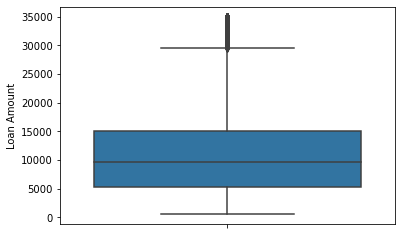

In [40]:
sns.boxplot( y=loan_df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

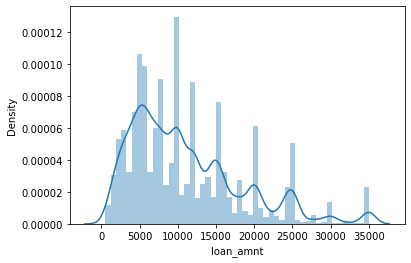

In [42]:
sns.distplot(loan_df.loan_amnt)
plt.show